In [12]:
import pandas as pd
from astropy.io import fits
from astropy.wcs import WCS
from copy import deepcopy
import matplotlib.pyplot as plt
import numpy as np
import cv2
import os

In [85]:
file_nums = 1
fiel_fre = "906_0.0_-27.0"
field1_path = "/home/dell460/slc/sdd_01/SKAData/CIP_random2/data/10field/catalog/catalog/skymodel_field_number_{}_2.73.txt".format(fiel_fre)
field1 = pd.read_csv(field1_path,skiprows=[0,2,3,4])
fitspath = '/home/dell460/slc/sdd_01/SKAData/CIP_random2/data/10field/field{}\
/CIP_8K_skymodel_field_number_{}_2.73_fov_2_73_nmoment3_cip.taylor.0.restored.fits'.format(file_nums,fiel_fre)
hdu = fits.open(fitspath)
hdr = hdu[0].header
wcs = WCS(hdr)
hdu.close()

In [86]:
def zerosra(ra):
    if ra>180:
        return ra-360
    return ra

In [87]:
RAS,DECS = field1["#    RA"],field1["    Dec"]

In [88]:
RAS = RAS.map(zerosra)
RAS

0      1.198100
1     -1.035772
2      0.514942
3     -0.923036
4      0.219793
         ...   
901   -1.181890
902    0.254390
903    0.609998
904   -0.599404
905    1.107025
Name: #    RA, Length: 906, dtype: float64

In [89]:
pixel = np.array(wcs.sub(2).all_world2pix(RAS,DECS,0)).T

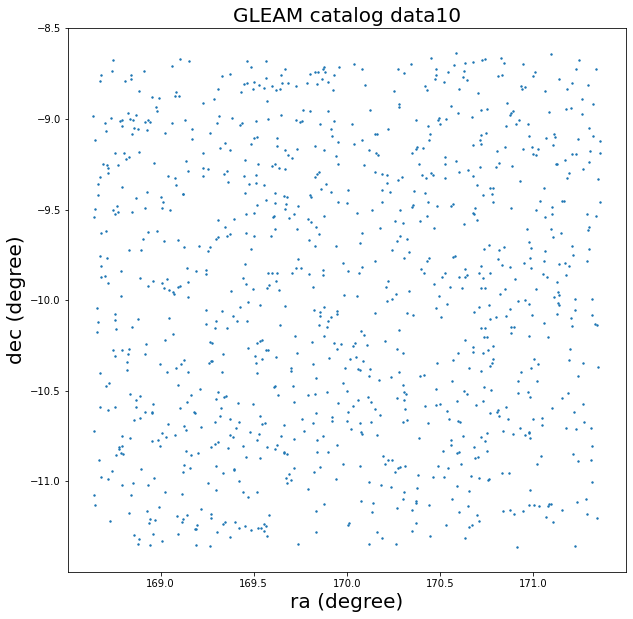

In [7]:
plt.figure(figsize=(10,10))
plt.scatter(RAS,DECS,s=2)
plt.xlabel('ra (degree)',fontsize=20)
plt.ylabel('dec (degree)',fontsize=20)
plt.title('GLEAM catalog data{}'.format(file_nums),fontsize=20)
plt.savefig("/home/dell460/slc/sdd_01/SKAData/CIP_random2/data/10field/field{}/Gleam_catalog_data{}.png".format(file_nums,file_nums))

In [90]:
target_x = []
target_y = []
target_I = []
cubesize = 8192
for i in range(pixel.shape[0]):
    if (0< pixel[i,0] < cubesize) and (0< pixel[i,1] < cubesize):
        target_x.append(pixel[i,0])
        target_y.append(pixel[i,1])
        target_I.append(field1['   I'][i])
print(len(target_x))
all_XYI = list(zip(target_x,target_y,target_I)) 
#np.savetxt("/home/dell460/slc/sdd_01/SKAData/CIP_random2/data/10field/field{}_label.txt".format(file_nums),all_XYI)

905


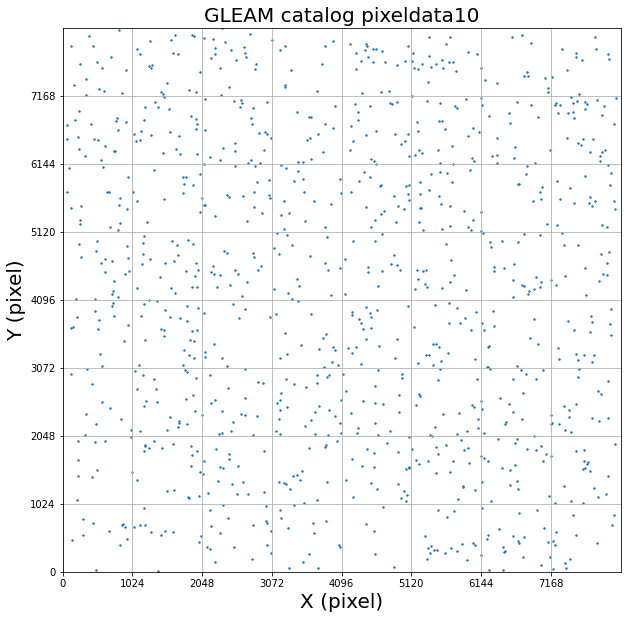

In [9]:
plt.figure(figsize=(10,10))
plt.grid()
plt.scatter(target_x,target_y,s=2)
plt.xlabel('X (pixel)',fontsize=20)
plt.ylabel('Y (pixel)',fontsize=20)
plt.xlim(0,8192)
plt.ylim(0,8192)
plt.xticks(range(0,8*1024,1024))
plt.yticks(range(0,8*1024,1024))
plt.title('GLEAM catalog pixeldata{}'.format(file_nums),fontsize=20)
# plt.show()
plt.savefig("/home/dell460/slc/sdd_01/SKAData/CIP_random2/data/10field/field{}/Gleam_pixel_catalog_data{}.png".format(file_nums,file_nums))

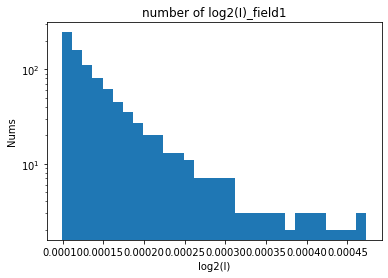

In [91]:
plt.hist((target_I),bins=30,log=True)
plt.title('number of log2(I)_field{}'.format(file_nums))
plt.xlabel('log2(I)')
plt.ylabel('Nums')
# plt.show()
plt.savefig("/home/dell460/slc/sdd_01/SKAData/CIP_random2/data/10field/field{}/Gleam_pixel_hist_log_catalog_data{}.png".format(file_nums,file_nums))

In [11]:
# 转换小图标签
def gleam_label1k(X,Y,cubesize):
        save_x = int(X/cubesize)*cubesize
        save_y = int(Y/cubesize)*cubesize
        x = X%cubesize
        y = Y%cubesize
        return save_x,save_y,x,y
savepath = "/home/dell460/slc/sdd_01/SKAData/CIP_random2/data/10field/field{}/label".format(file_nums)
savepath_I = "/home/dell460/slc/sdd_01/SKAData/CIP_random2/data/10field/label_I"
if not os.path.exists(savepath):
    os.makedirs(savepath)
if not os.path.exists(savepath_I):
    os.makedirs(savepath_I)
cubesize = 1024
for i in range(len(all_XYI)):
    save_x,save_y,x,y = gleam_label1k(all_XYI[i][0],all_XYI[i][1],cubesize)
    with open(savepath + '/' + 'image_field{}_random_{}_{}.list'.format(file_nums,save_x,save_y),mode = 'a') as f:
        #f.write(str(100) +' ' +  str(x) + ' ' + str(y) + ' ' + str(all_XYI[i][2]))
        f.write(str(100) +' ' +  str(x) + ' ' + str(y))
        f.write('\n')
    with open(savepath_I + '/' + 'image_field{}_random_{}_{}.list'.format(file_nums,save_x,save_y),mode = 'a') as f1:
        f1.write(str(100) +' ' +  str(x) + ' ' + str(y) + ' ' + str(all_XYI[i][2]))
        #f1.write(str(100) +' ' +  str(x) + ' ' + str(y))
        f1.write('\n')